### ANLY590 Homework1
##### Han Zhang

###### 1.1  LASSO

In [6]:
import pandas as pd

df = pd.read_csv("Hitters.csv") # read data from csv file
df.shape

(322, 21)

In [2]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [7]:
df.isnull().sum() # count of NAs

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [8]:
df = df.dropna() # drop empty entries

In [9]:
df.shape

(263, 21)

In [10]:
print(df.columns)

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')


In [21]:
y = df.Salary # define salary as response
x = df.drop(['Unnamed: 0','Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64') # drop categorical variables and salary

In [22]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # transform categorical variables to dummy values
X = pd.concat([x, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
print(X.head())

   AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5      

In [23]:
import numpy as np
alphas = 10**np.linspace(6, -2, 50)*0.5

In [24]:
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# fit the lasso model for each alpha
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'weights')

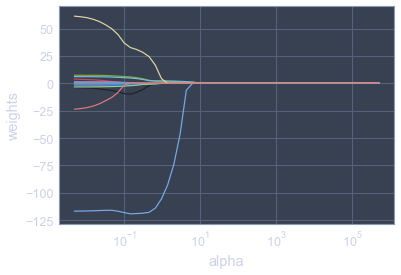

In [25]:
# plot coeffecient trajectories with log alpha
x_plot = plt.gca()
x_plot.plot(alphas, coefs)
x_plot.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')

In [27]:
# train test split with 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
# use 10-fold cross validation
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_) # penality
print("Optimal penality value: ", lassocv.alpha_)
lasso.fit(X_train, y_train)

print("Optimal MSE: ",mean_squared_error(y_test, lasso.predict(X_test)))
print("Optimal coefficients:")
pd.Series(lasso.coef_, index=X.columns)

Optimal penality value:  2.3327311765926555
Optimal MSE:  132568.611898037
Optimal coefficients:


AtBat           0.000000
Hits            2.319431
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           1.312234
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.000000
CRuns           0.378674
CRBI            0.289648
CWalks          0.000000
PutOuts         0.049478
Assists        -0.000000
Errors          0.000000
League_N       18.238258
Division_W    -70.030558
NewLeague_N     0.000000
dtype: float64

The optimal penality value is 2.3327311765926555.

We can see that there are 7 varialbes left in the optimal model: Hits, Walks, CRuns, CRBI, PutOuts, League_N and Division_W. 

The final three predictors that remain in the model would be Hits, League_N (numerical dummy values of League) and Division_W (numerical dummy values of Division). 

###### 1.2  Ridge

In [29]:
# fit the ridge model for each alpha
ridge = Ridge(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

Text(0, 0.5, 'weights')

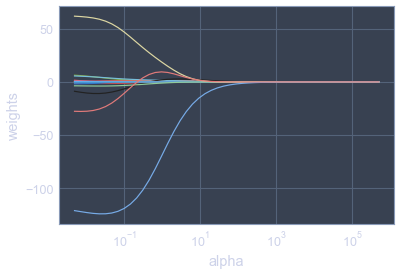

In [30]:
# plot coeffecient trajectories with log alpha
x_plot = plt.gca()
x_plot.plot(alphas, coefs)
x_plot.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')

In [32]:
# train test split with 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, y_train)

print("Optimal penality value: ", ridgecv.alpha_)
ridge_mod = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge_mod.fit(X_train, y_train)

print("Optimal MSE: ",mean_squared_error(y_test, ridge_mod.predict(X_test)))
print("Optimal coefficients:")
pd.Series(ridge_mod.coef_, index=X.columns)

Optimal penality value:  0.6628556827950555
Optimal MSE:  133945.09640067484
Optimal coefficients:


AtBat           0.147874
Hits            0.965208
HmRun          -0.561076
Runs            1.376327
RBI             0.699032
Walks           1.373229
Years           4.483471
CAtBat          0.015858
CHits           0.064186
CHmRun          0.404260
CRuns           0.130766
CRBI            0.125603
CWalks          0.035318
PutOuts         0.084546
Assists         0.006060
Errors          0.239744
League_N       49.954945
Division_W    -77.176949
NewLeague_N     1.539782
dtype: float64

The optimal vaule of the regularization penalty is 0.6628556827950555.

######  2  Short answer
Explain in your own words the bias-variance tradeoff.  What role does regularization play in this tradeoff?  Make reference to your findings in number (1) to describe models of high/low bias and variance. 

Bias-variance tradeoff is a "dilemma" in machine learning when we try to build a model that is best fit of the data. Although we need to minimize bias and vaiance in order to improve the model, it is impossible to do so since a simple model with few parameters may have low variance but high bias (underfitting) while a complex model with many parameters may have low bias but high variance (overfitting). 

Regularization is a useful tool for preventing overfitting. By imposing penalty on the size of coefficients, it minimizes the overall error while restrict the number of variables used in the model. With an increase in bias, it is possible to have an decrease in variance. The difference between Lasso and Ridge is that Lasso regression shrinks the less important feature’s coefficient to zero thus removing them from model to avoid overfitting, while Ridge will shrink some coefficients close to zero to reduce their impact on the model. 

As we can see from above, with smaller penalty, the absolute value of coefficients are larger. In this case, the model have higher variance and lower bias since overfitting is possible. Similarly, with larger penalty, coefficients are shrink to zero in Lasso and Ridge models. The bias is reduced while variances increase because the models then contain less parameters and the problem of underfitting could occur.